In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
k = pd.read_csv("water_dataX.csv", encoding="ISO-8859-1")

In [4]:
k.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [5]:
k.notnull().sum()

STATION CODE                        1991
LOCATIONS                           1991
STATE                               1991
Temp                                1991
D.O. (mg/l)                         1991
PH                                  1991
CONDUCTIVITY (µmhos/cm)             1991
B.O.D. (mg/l)                       1991
NITRATENAN N+ NITRITENANN (mg/l)    1991
FECAL COLIFORM (MPN/100ml)          1991
TOTAL COLIFORM (MPN/100ml)Mean      1991
year                                1991
dtype: int64

In [6]:
k.fillna(0, inplace=True)

In [7]:
k.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [8]:
k['Temp']=pd.to_numeric(k['Temp'],errors='coerce')
k['D.O. (mg/l)']=pd.to_numeric(k['D.O. (mg/l)'],errors='coerce')
k['PH']=pd.to_numeric(k['PH'],errors='coerce')
k['B.O.D. (mg/l)']=pd.to_numeric(k['B.O.D. (mg/l)'],errors='coerce')
k['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(k['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
k['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(k['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
k['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(k['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
k.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [9]:
start=2
end=1779
station=k.iloc [start:end ,0]
location=k.iloc [start:end ,1]
state=k.iloc [start:end ,2]
do= k.iloc [start:end ,4].astype(np.float64)
value=0
ph = k.iloc[ start:end,5]  
co = k.iloc [start:end ,6].astype(np.float64)   
  
year=k.iloc[start:end,11]
tc=k.iloc [start:end ,10].astype(np.float64)

bod = k.iloc [start:end ,7].astype(np.float64)
na= k.iloc [start:end ,8].astype(np.float64)

In [10]:
k=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
k.columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [11]:
# Here I have created a new column and specified range according to pH level like if it is between 7 and 8.5 applied score 100 bcz its desired pH lvl of water 
k['npH']=k.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))


In [12]:
# DISSOLVED OXYGEN level in water (mg/l) which is important factor in washing machine for detergent action
k['ndo']=k.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [13]:
# CONDUCTIVITY (µmhos/cm)
k['nco']=k.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [14]:
k['nbdo']=k.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [15]:
k['nec']=k.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [16]:
k['nna']=k.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [17]:
k['wph']=k.npH * 0.165
k['wdo']=k.ndo * 0.281
k['wbdo']=k.nbdo * 0.234
k['wec']=k.nec* 0.011
k['wna']=k.nna * 0.028
k['wco']=k.nco * 0.281
k['wqi']=k.wph+k.wdo+k.wbdo+k.wec+k.wna+k.wco 

#Here I have assigned weights According to their role in detergent action in water and their importance to calculate water quality index

In [18]:
ag=k.groupby('year')['wqi'].mean()

In [19]:
ag.head(10)

year
2006    71.367647
2007    72.639000
2008    72.672579
2009    74.153039
2010    74.742766
2011    75.739827
2012    79.077260
2013    75.113180
2014    76.982798
Name: wqi, dtype: float64

In [20]:
data=ag.reset_index(level=0,inplace=False)
data

,year,wqi
0,2006,71.367647
1,2007,72.639000
2,2008,72.672579
3,2009,74.153039
4,2010,74.742766
5,2011,75.739827
6,2012,79.077260
7,2013,75.113180
8,2014,76.982798


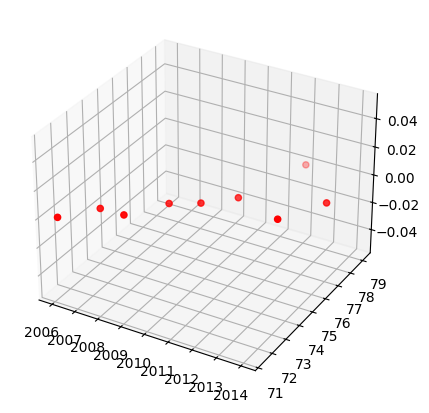

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

year = data['year'].values
AQI = data['wqi'].values

fig = plt.figure(figsize=(5.0, 5.0))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(year, AQI, color='red')

plt.show()


In [22]:
data = data[np.isfinite(data['wqi'])]
data.head()

,year,wqi
0,2006,71.367647
1,2007,72.639000
2,2008,72.672579
3,2009,74.153039
4,2010,74.742766


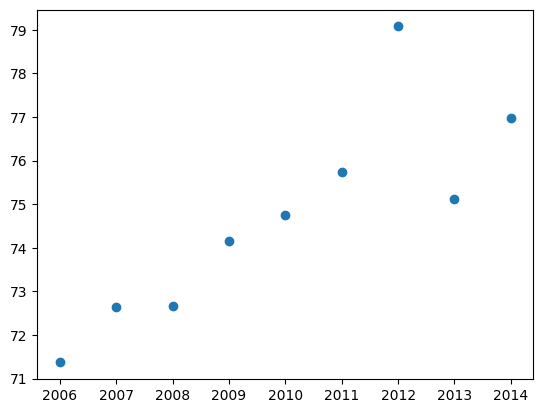

In [23]:
cols =['year']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

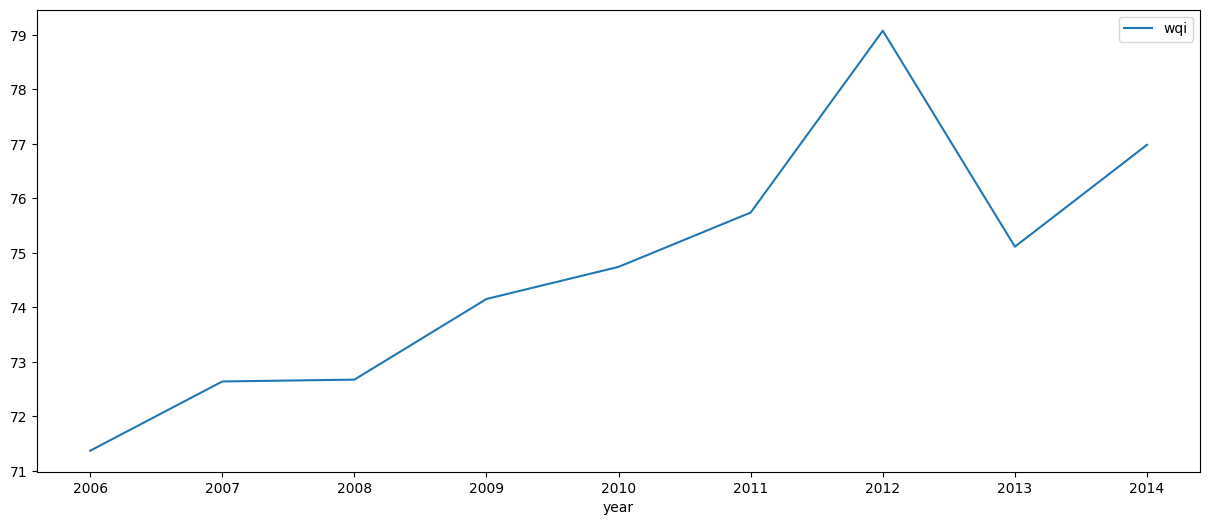

In [24]:
import matplotlib.pyplot as plt
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [25]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,year,wqi
0,2006,71.367647
1,2007,72.639000
2,2008,72.672579
3,2009,74.153039
4,2010,74.742766
5,2011,75.739827
6,2012,79.077260
7,2013,75.113180
8,2014,76.982798


In [26]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [27]:
cols = ['year']
y = data['wqi']
x=data[cols]
# x = data[['year']]

In [28]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
reg.fit(x_train,y_train)
a=reg.predict(x_test)
a

# Here I am predicting water quality index which is dependent variable on year 
# y = k + Bx

array([73.95164755, 74.69299235])

In [29]:
y_test

3    74.153039
4    74.742766
Name: wqi, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 
dt
#Here I have plotted actual wqi and predicted wqi

mse:0.02


,Actual,Predicted
3,74.153039,73.951648
4,74.742766,74.692992


In [38]:
x = (x - x.mean()) / x.std() #feature scaling k- (mean of k)/ standard deviation of k
x

array([[ 0.6       , -2.35271218],
       [ 0.6       , -1.91453414],
       [ 0.6       , -1.47635609],
       [ 0.6       , -1.03817805],
       [ 0.6       , -0.6       ],
       [ 0.6       , -0.16182195],
       [ 0.6       ,  0.27635609],
       [ 0.6       ,  0.71453414],
       [ 0.6       ,  1.15271218]])

In [39]:
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  0.6       , -2.35271218],
       [ 1.        ,  0.6       , -1.91453414],
       [ 1.        ,  0.6       , -1.47635609],
       [ 1.        ,  0.6       , -1.03817805],
       [ 1.        ,  0.6       , -0.6       ],
       [ 1.        ,  0.6       , -0.16182195],
       [ 1.        ,  0.6       ,  0.27635609],
       [ 1.        ,  0.6       ,  0.71453414],
       [ 1.        ,  0.6       ,  1.15271218]])

In [32]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 74.72, 2.02


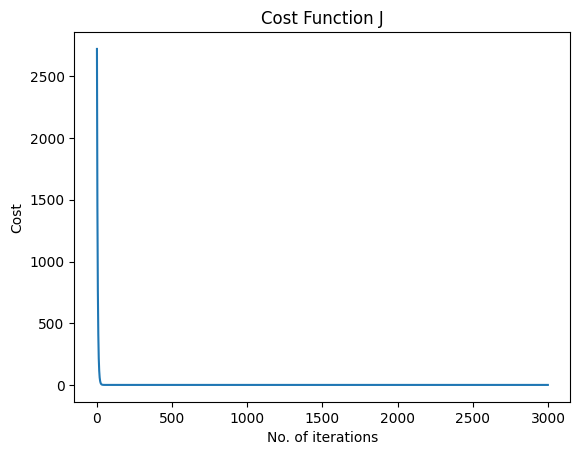

In [33]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [43]:
import numpy as np
newB=[74.76, 2.13]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt


ValueError: shapes (9,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [35]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

1.19324143577289


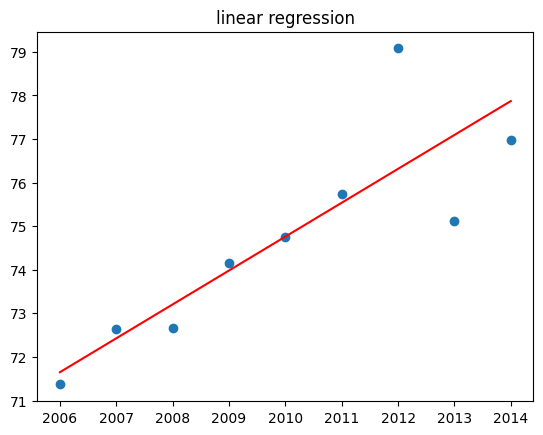

In [36]:
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()
